<a href="https://colab.research.google.com/github/Timothy-M-C/cs_6375/blob/main/CS_6375_Assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

from sklearn.metrics import mean_absolute_percentage_error as mape
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score

### Section 2.1
I Chose the "California Housing Dataset".

Response variable:
medianhousevalue

Predictors: 
longitude,
latitude,
housingmedianage,
total_rooms,
total_bedrooms,
population,
households, 
median_income, 
ocean_proximity.

In [11]:
# I chose the 'California Housing Dataset'
housing = pd.read_csv('https://raw.githubusercontent.com/Timothy-M-C/cs_6375/main/housing.csv')

### Section 2.2 
Analyze the data.

In [12]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600,NEAR BAY
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500,NEAR BAY
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100,NEAR BAY
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300,NEAR BAY
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200,NEAR BAY


ocean_proximity appears to be a categorical variable, to use this variable in linear regression we must transform it into indicator/dummy variables.

In [13]:
# convert categorical variable ocean proximity to a group of dummy variables
housing = pd.get_dummies(housing, columns=['ocean_proximity'])

In [14]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   longitude                   20640 non-null  float64
 1   latitude                    20640 non-null  float64
 2   housing_median_age          20640 non-null  int64  
 3   total_rooms                 20640 non-null  int64  
 4   total_bedrooms              20433 non-null  float64
 5   population                  20640 non-null  int64  
 6   households                  20640 non-null  int64  
 7   median_income               20640 non-null  float64
 8   median_house_value          20640 non-null  int64  
 9   ocean_proximity_<1H OCEAN   20640 non-null  uint8  
 10  ocean_proximity_INLAND      20640 non-null  uint8  
 11  ocean_proximity_ISLAND      20640 non-null  uint8  
 12  ocean_proximity_NEAR BAY    20640 non-null  uint8  
 13  ocean_proximity_NEAR OCEAN  206

In [15]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909,0.442636,0.317393,0.000242,0.110950,0.128779
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874,0.496710,0.465473,0.015563,0.314077,0.334963
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000,1.000000,1.000000,0.000000,0.000000,0.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [16]:
# note that bedrooms has some NA values
housing.isna().sum()

longitude                       0
latitude                        0
housing_median_age              0
total_rooms                     0
total_bedrooms                207
population                      0
households                      0
median_income                   0
median_house_value              0
ocean_proximity_<1H OCEAN       0
ocean_proximity_INLAND          0
ocean_proximity_ISLAND          0
ocean_proximity_NEAR BAY        0
ocean_proximity_NEAR OCEAN      0
dtype: int64

In [17]:
# plot correlation matrix
corr = housing.corr()
corr.style.background_gradient()
corr.style.background_gradient().set_precision(2)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  after removing the cwd from sys.path.


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
longitude,1.00,-0.92,-0.11,0.04,0.07,0.10,0.06,-0.02,-0.05,0.32,-0.06,0.01,-0.47,0.05
latitude,-0.92,1.00,0.01,-0.04,-0.07,-0.11,-0.07,-0.08,-0.14,-0.45,0.35,-0.02,0.36,-0.16
housing_median_age,-0.11,0.01,1.00,-0.36,-0.32,-0.30,-0.30,-0.12,0.11,0.05,-0.24,0.02,0.26,0.02
total_rooms,0.04,-0.04,-0.36,1.00,0.93,0.86,0.92,0.20,0.13,-0.00,0.03,-0.01,-0.02,-0.01
total_bedrooms,0.07,-0.07,-0.32,0.93,1.00,0.88,0.98,-0.01,0.05,0.02,-0.01,-0.00,-0.02,0.00
population,0.10,-0.11,-0.30,0.86,0.88,1.00,0.91,0.00,-0.02,0.07,-0.02,-0.01,-0.06,-0.02
households,0.06,-0.07,-0.30,0.92,0.98,0.91,1.00,0.01,0.07,0.04,-0.04,-0.01,-0.01,0.00
median_income,-0.02,-0.08,-0.12,0.20,-0.01,0.00,0.01,1.00,0.69,0.17,-0.24,-0.01,0.06,0.03
median_house_value,-0.05,-0.14,0.11,0.13,0.05,-0.02,0.07,0.69,1.00,0.26,-0.48,0.02,0.16,0.14
ocean_proximity_<1H OCEAN,0.32,-0.45,0.05,-0.00,0.02,0.07,0.04,0.17,0.26,1.00,-0.61,-0.01,-0.31,-0.34


median income has the highest correlation with our predictor. We can also see things like total bedrooms, rooms, population and households are highly correlated predictors.

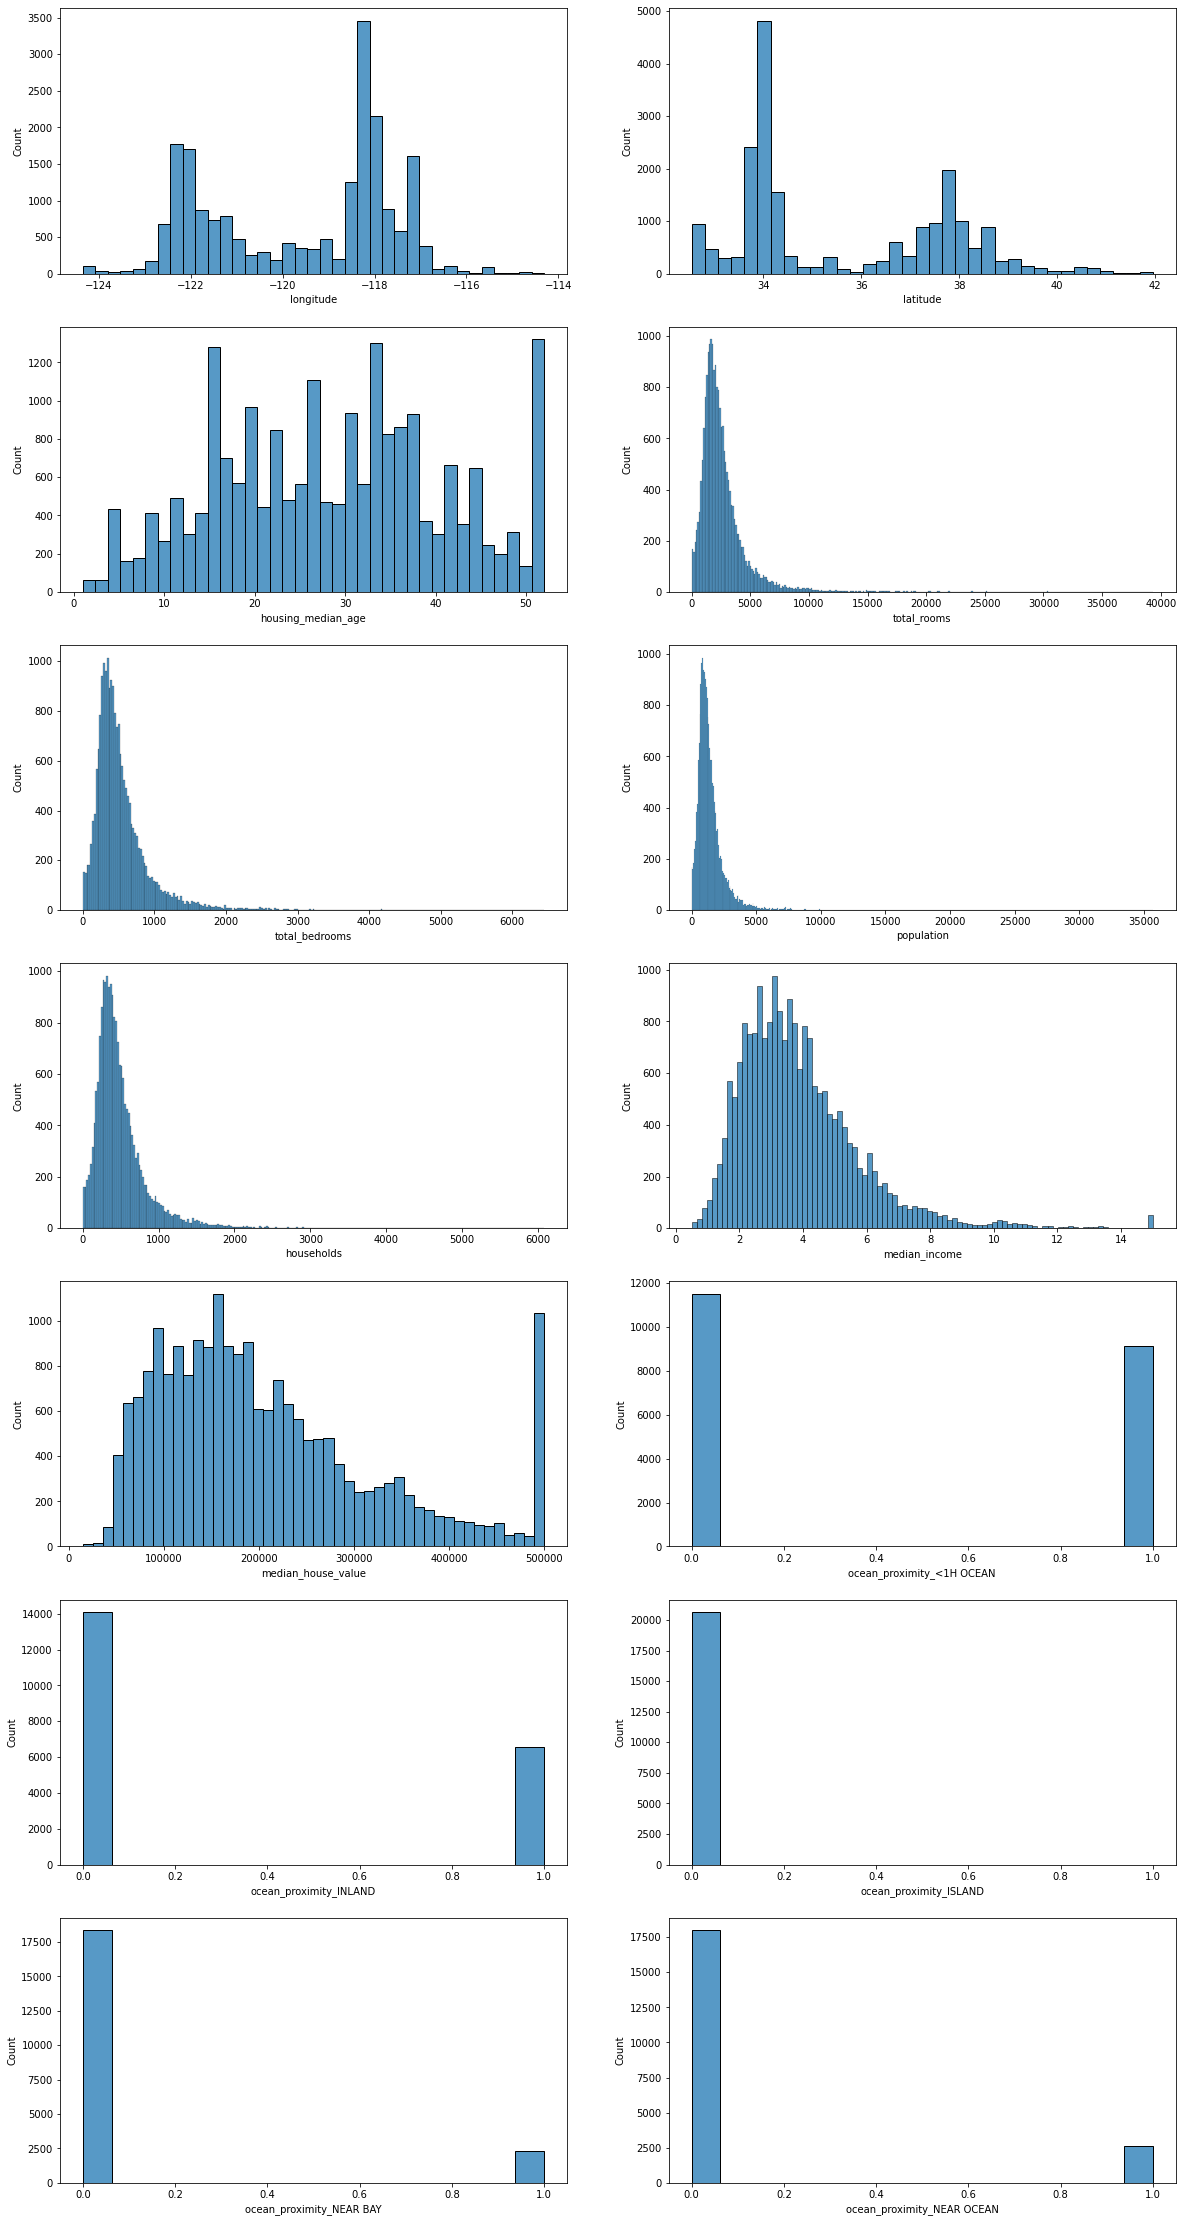

In [18]:
# plot distributions
fig, axes = plt.subplots(ncols=2, nrows=7, figsize=[20, 40])
for idx, col in enumerate(housing.columns):
  sns.histplot(housing[col], ax = axes[idx // 2, idx % 2])

Households, rooms, bedrooms and population have similar distributions that are right skewed. 

Median income and median house value are more normally distributed but still right skewed. 

house median age.

longitude and latitude look like bimodal distributions. 


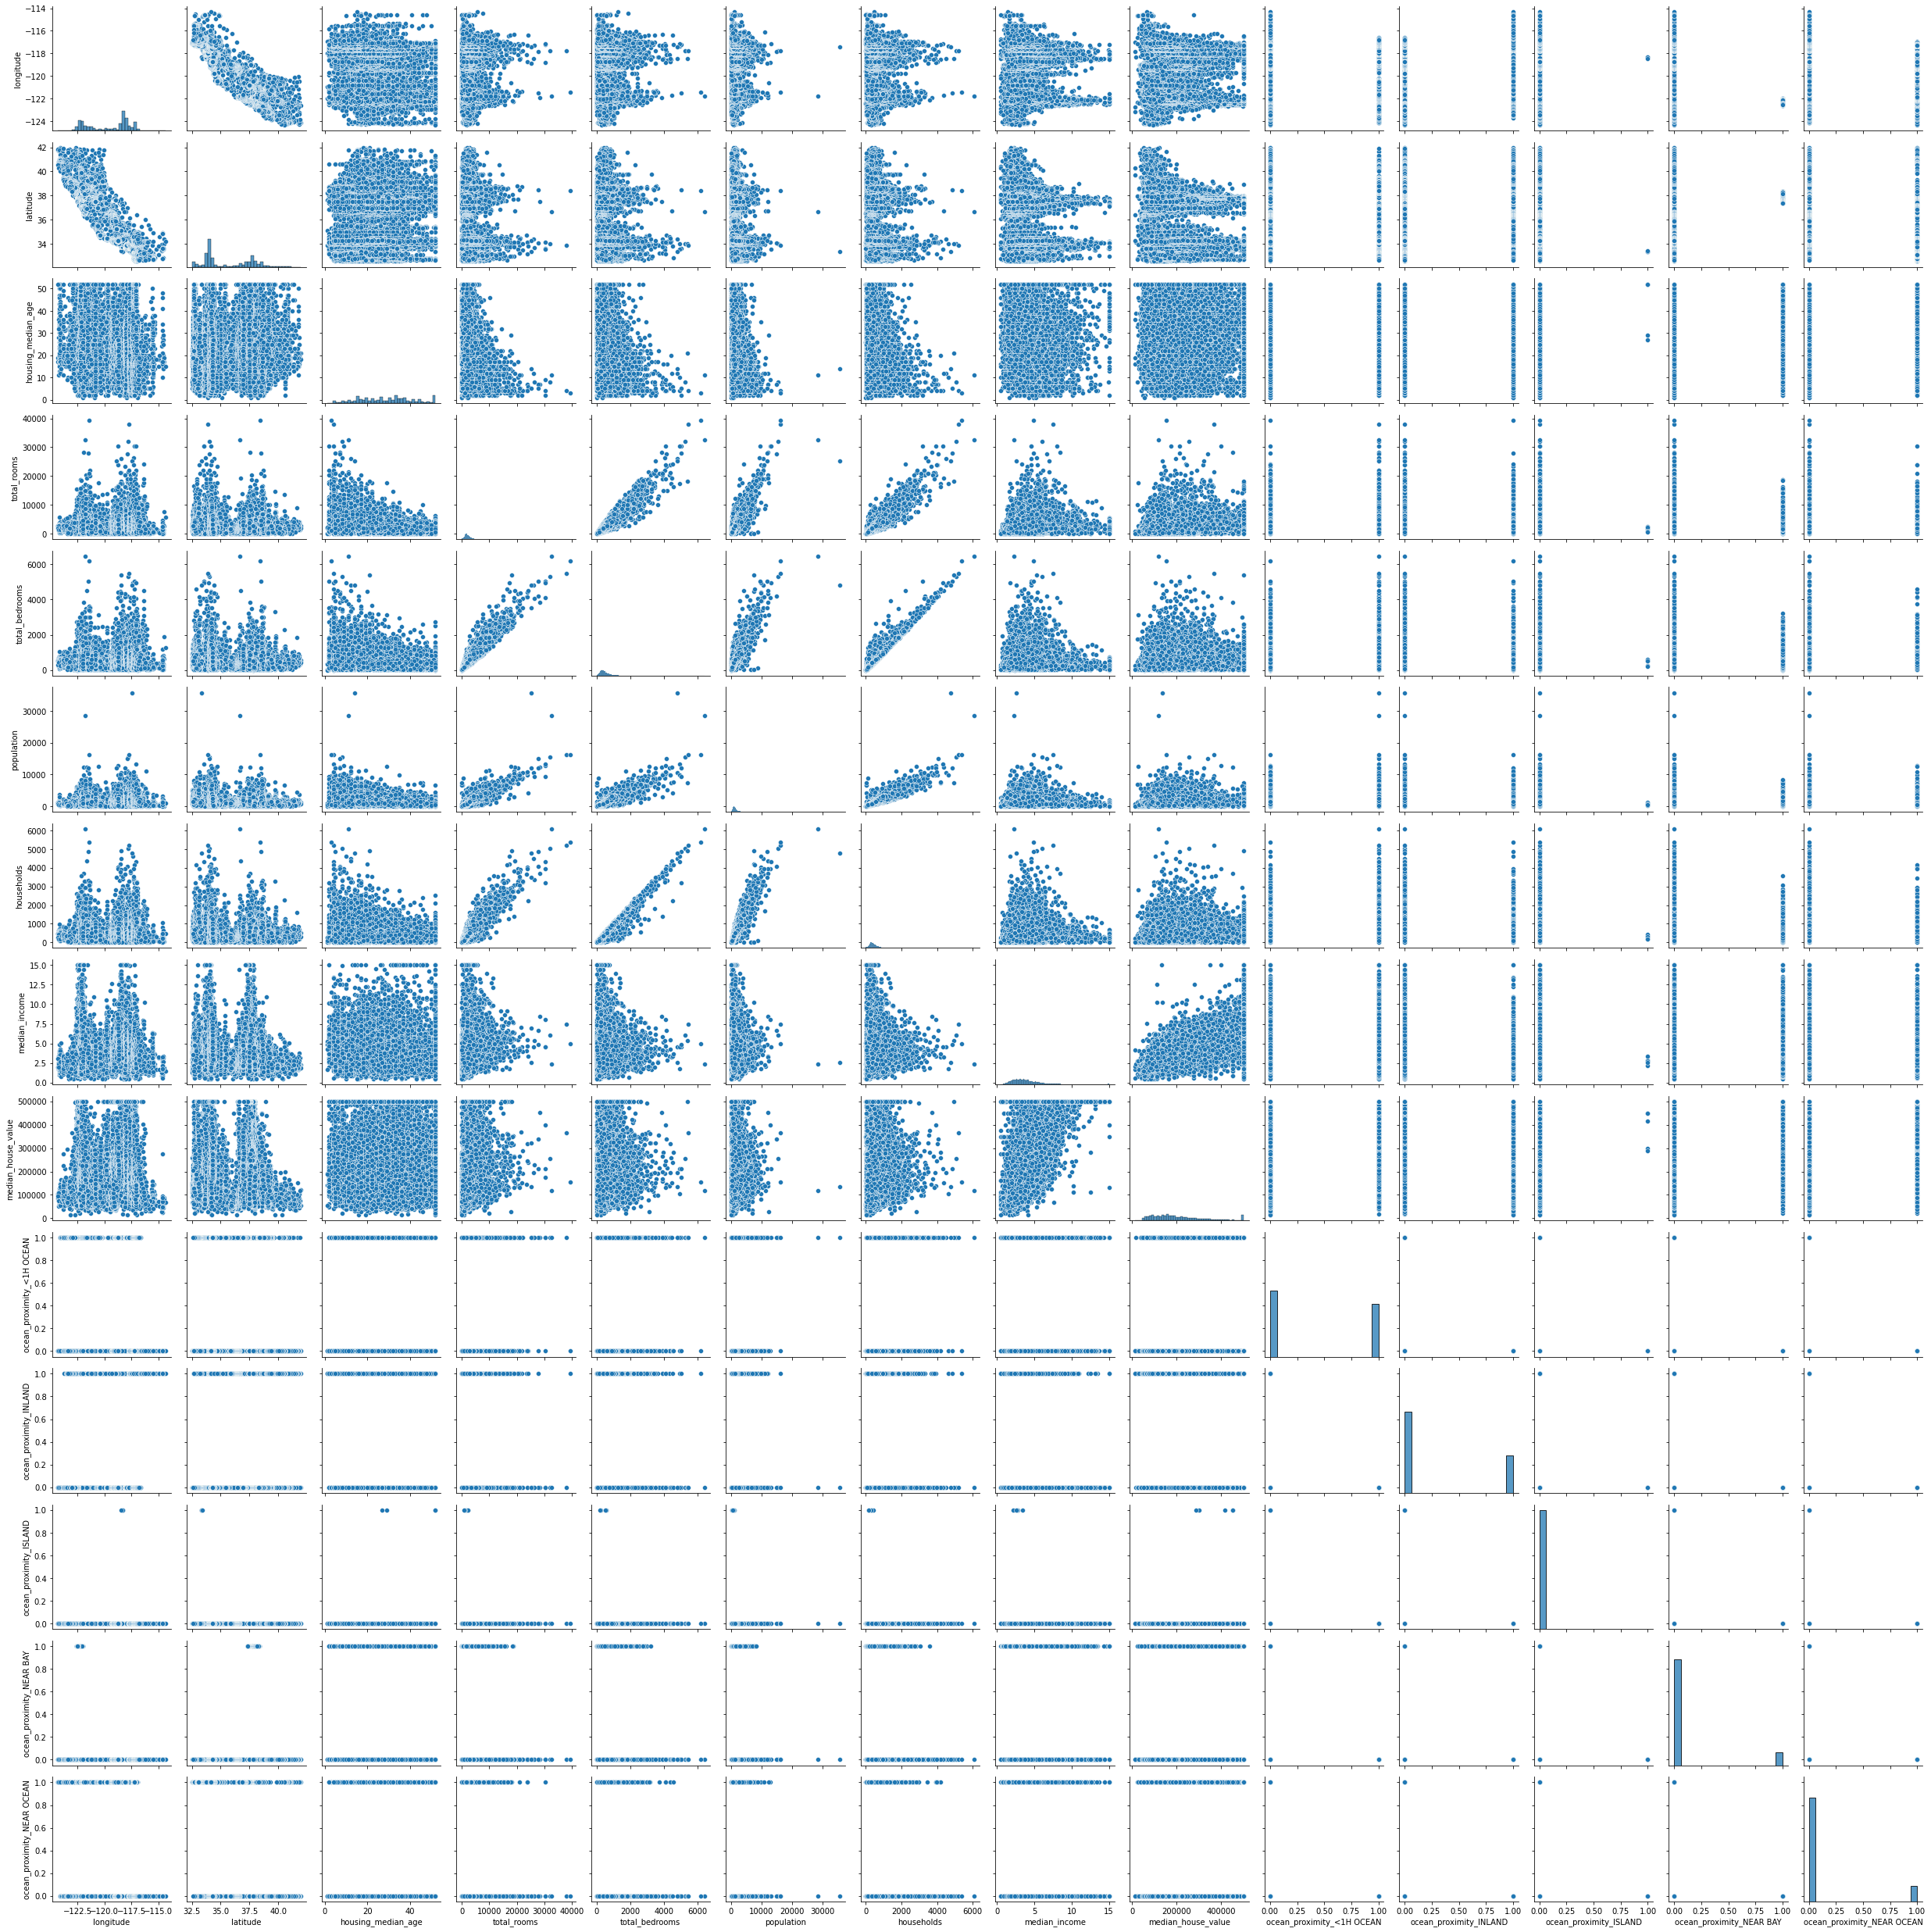

In [19]:
sns.pairplot(housing)

Median Income looks like the only predictor with a linear relationship with our response variable. We can also see how linearly related bedrooms, rooms, households and population is.

### Section 2.3
Identify at least two variables that look promising in predicting out put.

I have chosen median income and ocean proximity and total rooms.

**Justification of this decision:**
1. Median income has the highest correlation with our response variable.
2. Some ocean proximity dummy variables show signs of high correlation with our reponse.
3. Total rooms is the 3rd highest variable in terms of correlation with our response. Also, because total rooms is so linearly related to households, bedrooms, and population it can be used inplace of these variables. I believe it is worthwhile to keep this variable.


In [20]:
# dataframe with only variables of interest
reduced_housing = housing[['median_income', 'total_rooms', 'ocean_proximity_<1H OCEAN','ocean_proximity_INLAND', 'ocean_proximity_ISLAND', 'ocean_proximity_NEAR BAY', 'ocean_proximity_NEAR OCEAN', 'median_house_value']]

In [21]:
# reduced correlation matrix
corr = reduced_housing.corr()
corr.style.background_gradient()
corr.style.background_gradient().set_precision(2)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  after removing the cwd from sys.path.


,median_income,total_rooms,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN,median_house_value
median_income,1.00,0.20,0.17,-0.24,-0.01,0.06,0.03,0.69
total_rooms,0.20,1.00,-0.00,0.03,-0.01,-0.02,-0.01,0.13
ocean_proximity_<1H OCEAN,0.17,-0.00,1.00,-0.61,-0.01,-0.31,-0.34,0.26
ocean_proximity_INLAND,-0.24,0.03,-0.61,1.00,-0.01,-0.24,-0.26,-0.48
ocean_proximity_ISLAND,-0.01,-0.01,-0.01,-0.01,1.00,-0.01,-0.01,0.02
ocean_proximity_NEAR BAY,0.06,-0.02,-0.31,-0.24,-0.01,1.00,-0.14,0.16
ocean_proximity_NEAR OCEAN,0.03,-0.01,-0.34,-0.26,-0.01,-0.14,1.00,0.14
median_house_value,0.69,0.13,0.26,-0.48,0.02,0.16,0.14,1.00


### Section 2.4
Train/Test split

In [22]:
# separate predictors and target
X = reduced_housing.iloc[:, 0:-1]
y = reduced_housing['median_house_value']

# training data size 80% of the data, use train to create model
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state=99)


### Section 2.5 - 2.6
Create OLS model and SGD model

In [23]:
# ordinary least squares model
ols = LinearRegression().fit(X_train, y_train)

# stochastic gradeint descent model
# always scale input for sgd model
# tweak paramaters as needed
sgd = make_pipeline(StandardScaler(), SGDRegressor(max_iter=100000, tol=1e-8, alpha=0.5))
sgd.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('sgdregressor',
                 SGDRegressor(alpha=0.5, max_iter=100000, tol=1e-08))])

### Section 2.7
Compare the two models

In [24]:
# R^2 for ols train and test
print("OLS train score: " , ols.score(X_train, y_train))
print("OLS test score: ", ols.score(X_test, y_test))

# MSE takes in y and y-pred
y_train_pred_ols = ols.predict(X_train)
ols_mse = mse(y_train, y_train_pred_ols, squared = False)

#chose RMSE because dealing with house prices in the hundreds of thousands results in very large numbers
print("RMSE: ", ols_mse)



OLS train score:  0.5861520324427223
OLS test score:  0.5983851001461998
RMSE:  74519.86116348363


In [25]:
# R^2 for sgd train and test
print("SGD train score: " , sgd.score(X_train, y_train))
print("SGD test score: ", sgd.score(X_test, y_test))

# MSE
y_train_pred_sgd = sgd.predict(X_train)
sgd_mse = mse(y_train, y_train_pred_sgd,squared = False)
print("RMSE: ", sgd_mse)

SGD train score:  0.5376058399340827
SGD test score:  0.5493400609483083
RMSE:  78769.44653570473
